# Table of Contents
>## 1. Convolution

>## 2. Sparse Connectivity

>## 3. Shared Weights and Bias

>## 4. Multiple Feature Maps

>## 5. Max Pooling

>## 6. Output Layer

>## 7. Multi-Channel CNN

>## 8. Demo

# 1. Convolution
* Inner-product using **kernel** $\rightarrow$ Create a **feature map**
* **Feature Map**: visualizes how the feature is distributed along the image

<img src="http://i.stack.imgur.com/GvsBA.jpg">

In [1]:
r1 = np.zeros(16)
r2 = np.hstack([np.zeros(2), np.ones(12), np.zeros(2)])
r3 = np.insert(np.insert(np.zeros(14), 2, 1), -2, 1)
x = 15 * np.vstack([r1, r1, r2, np.tile(r3, (10, 1)), r2, r1, r1])

In [33]:
k1 = np.zeros((2,2))
k1[:,0] = 0.5; k1[:,1] = -0.5
k1

array([[ 0.5, -0.5],
       [ 0.5, -0.5]])

In [34]:
k2 = np.zeros((2,2))
k2[0, :] = 0.5; k2[1, :] = -0.5
k2

array([[ 0.5,  0.5],
       [-0.5, -0.5]])

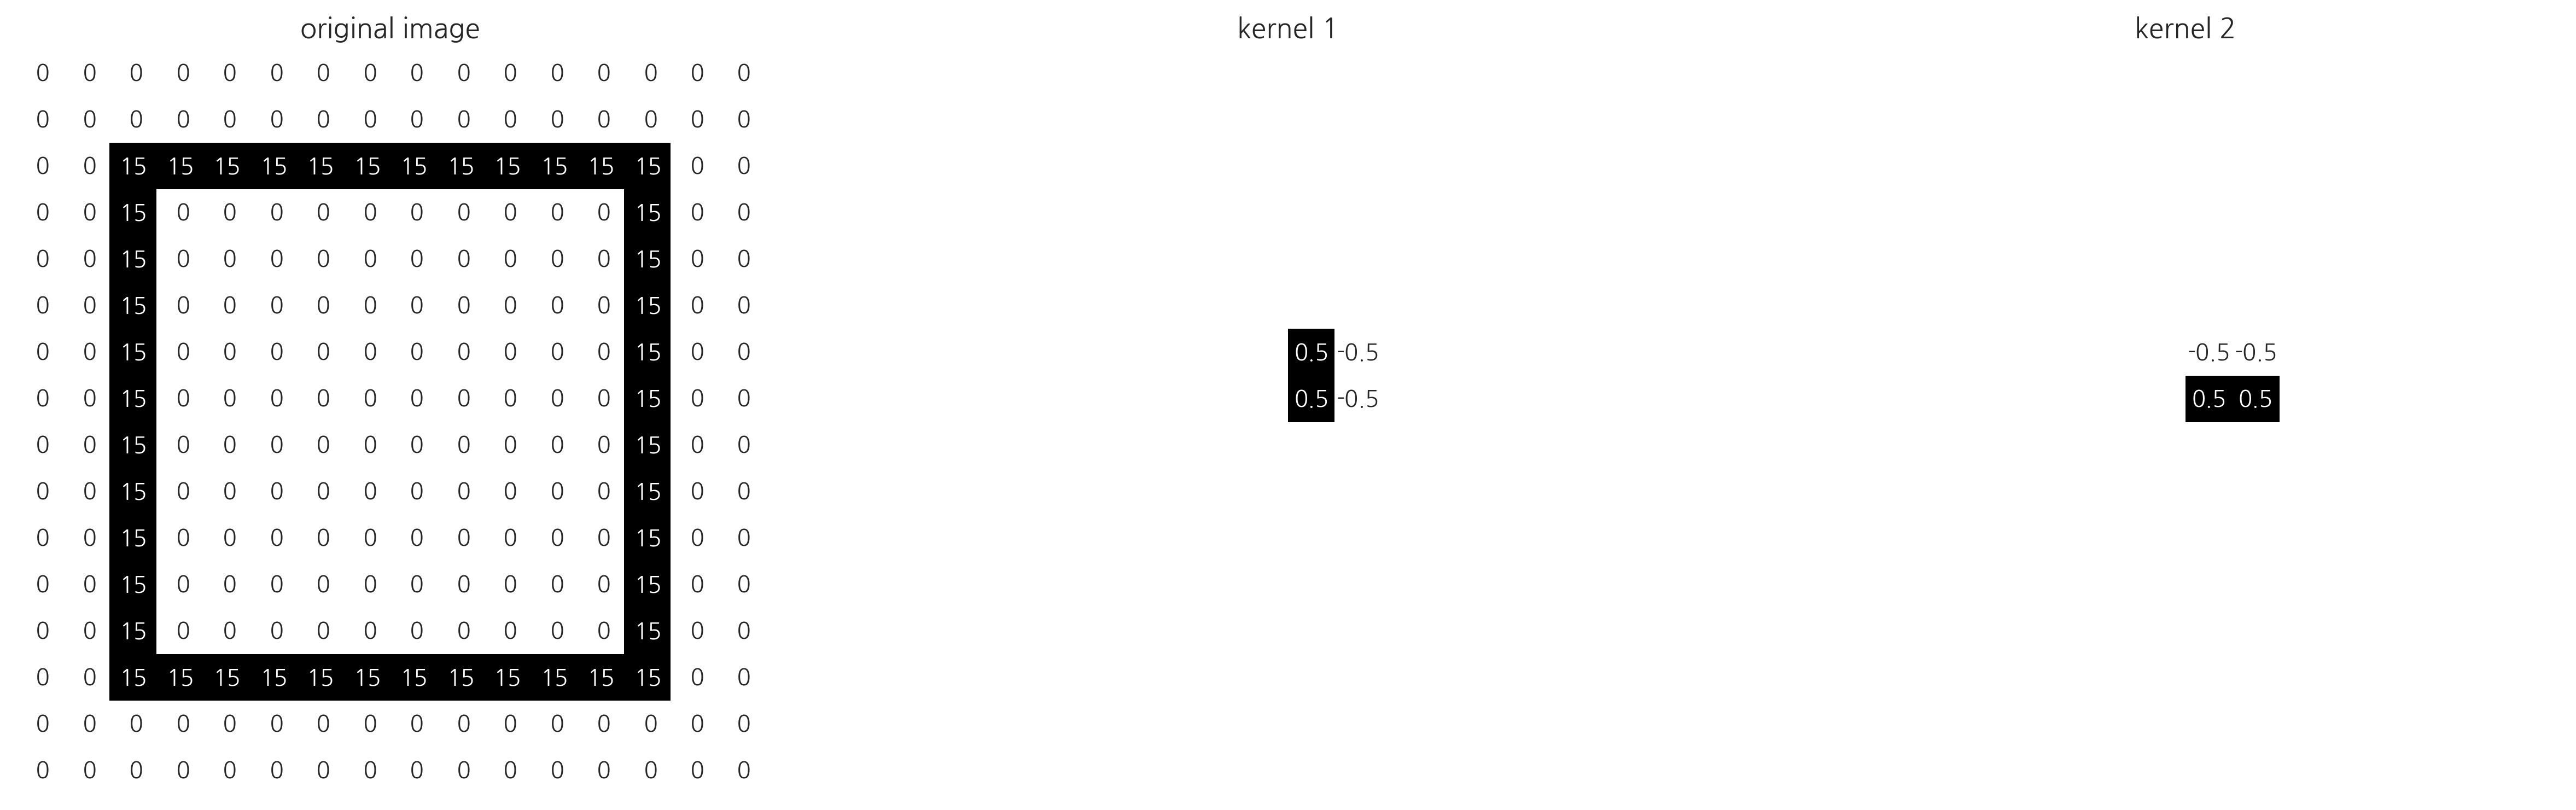

In [50]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.heatmap(x, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f",
            cbar=False, xticklabels=False, yticklabels=False)
plt.title("original image")
plt.subplot(132)
sns.heatmap(k1, cmap=mpl.cm.bone_r, annot=True, fmt="2.1f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.title("kernel 1")
plt.subplot(133)
sns.heatmap(k2, cmap=mpl.cm.bone_r, annot=True, fmt="2.1f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.title("kernel 2")
plt.show()

In [36]:
from scipy.ndimage.filters import convolve

phi1 = convolve(x, k1)
phi2 = convolve(x, k2)

In [41]:
convolve?

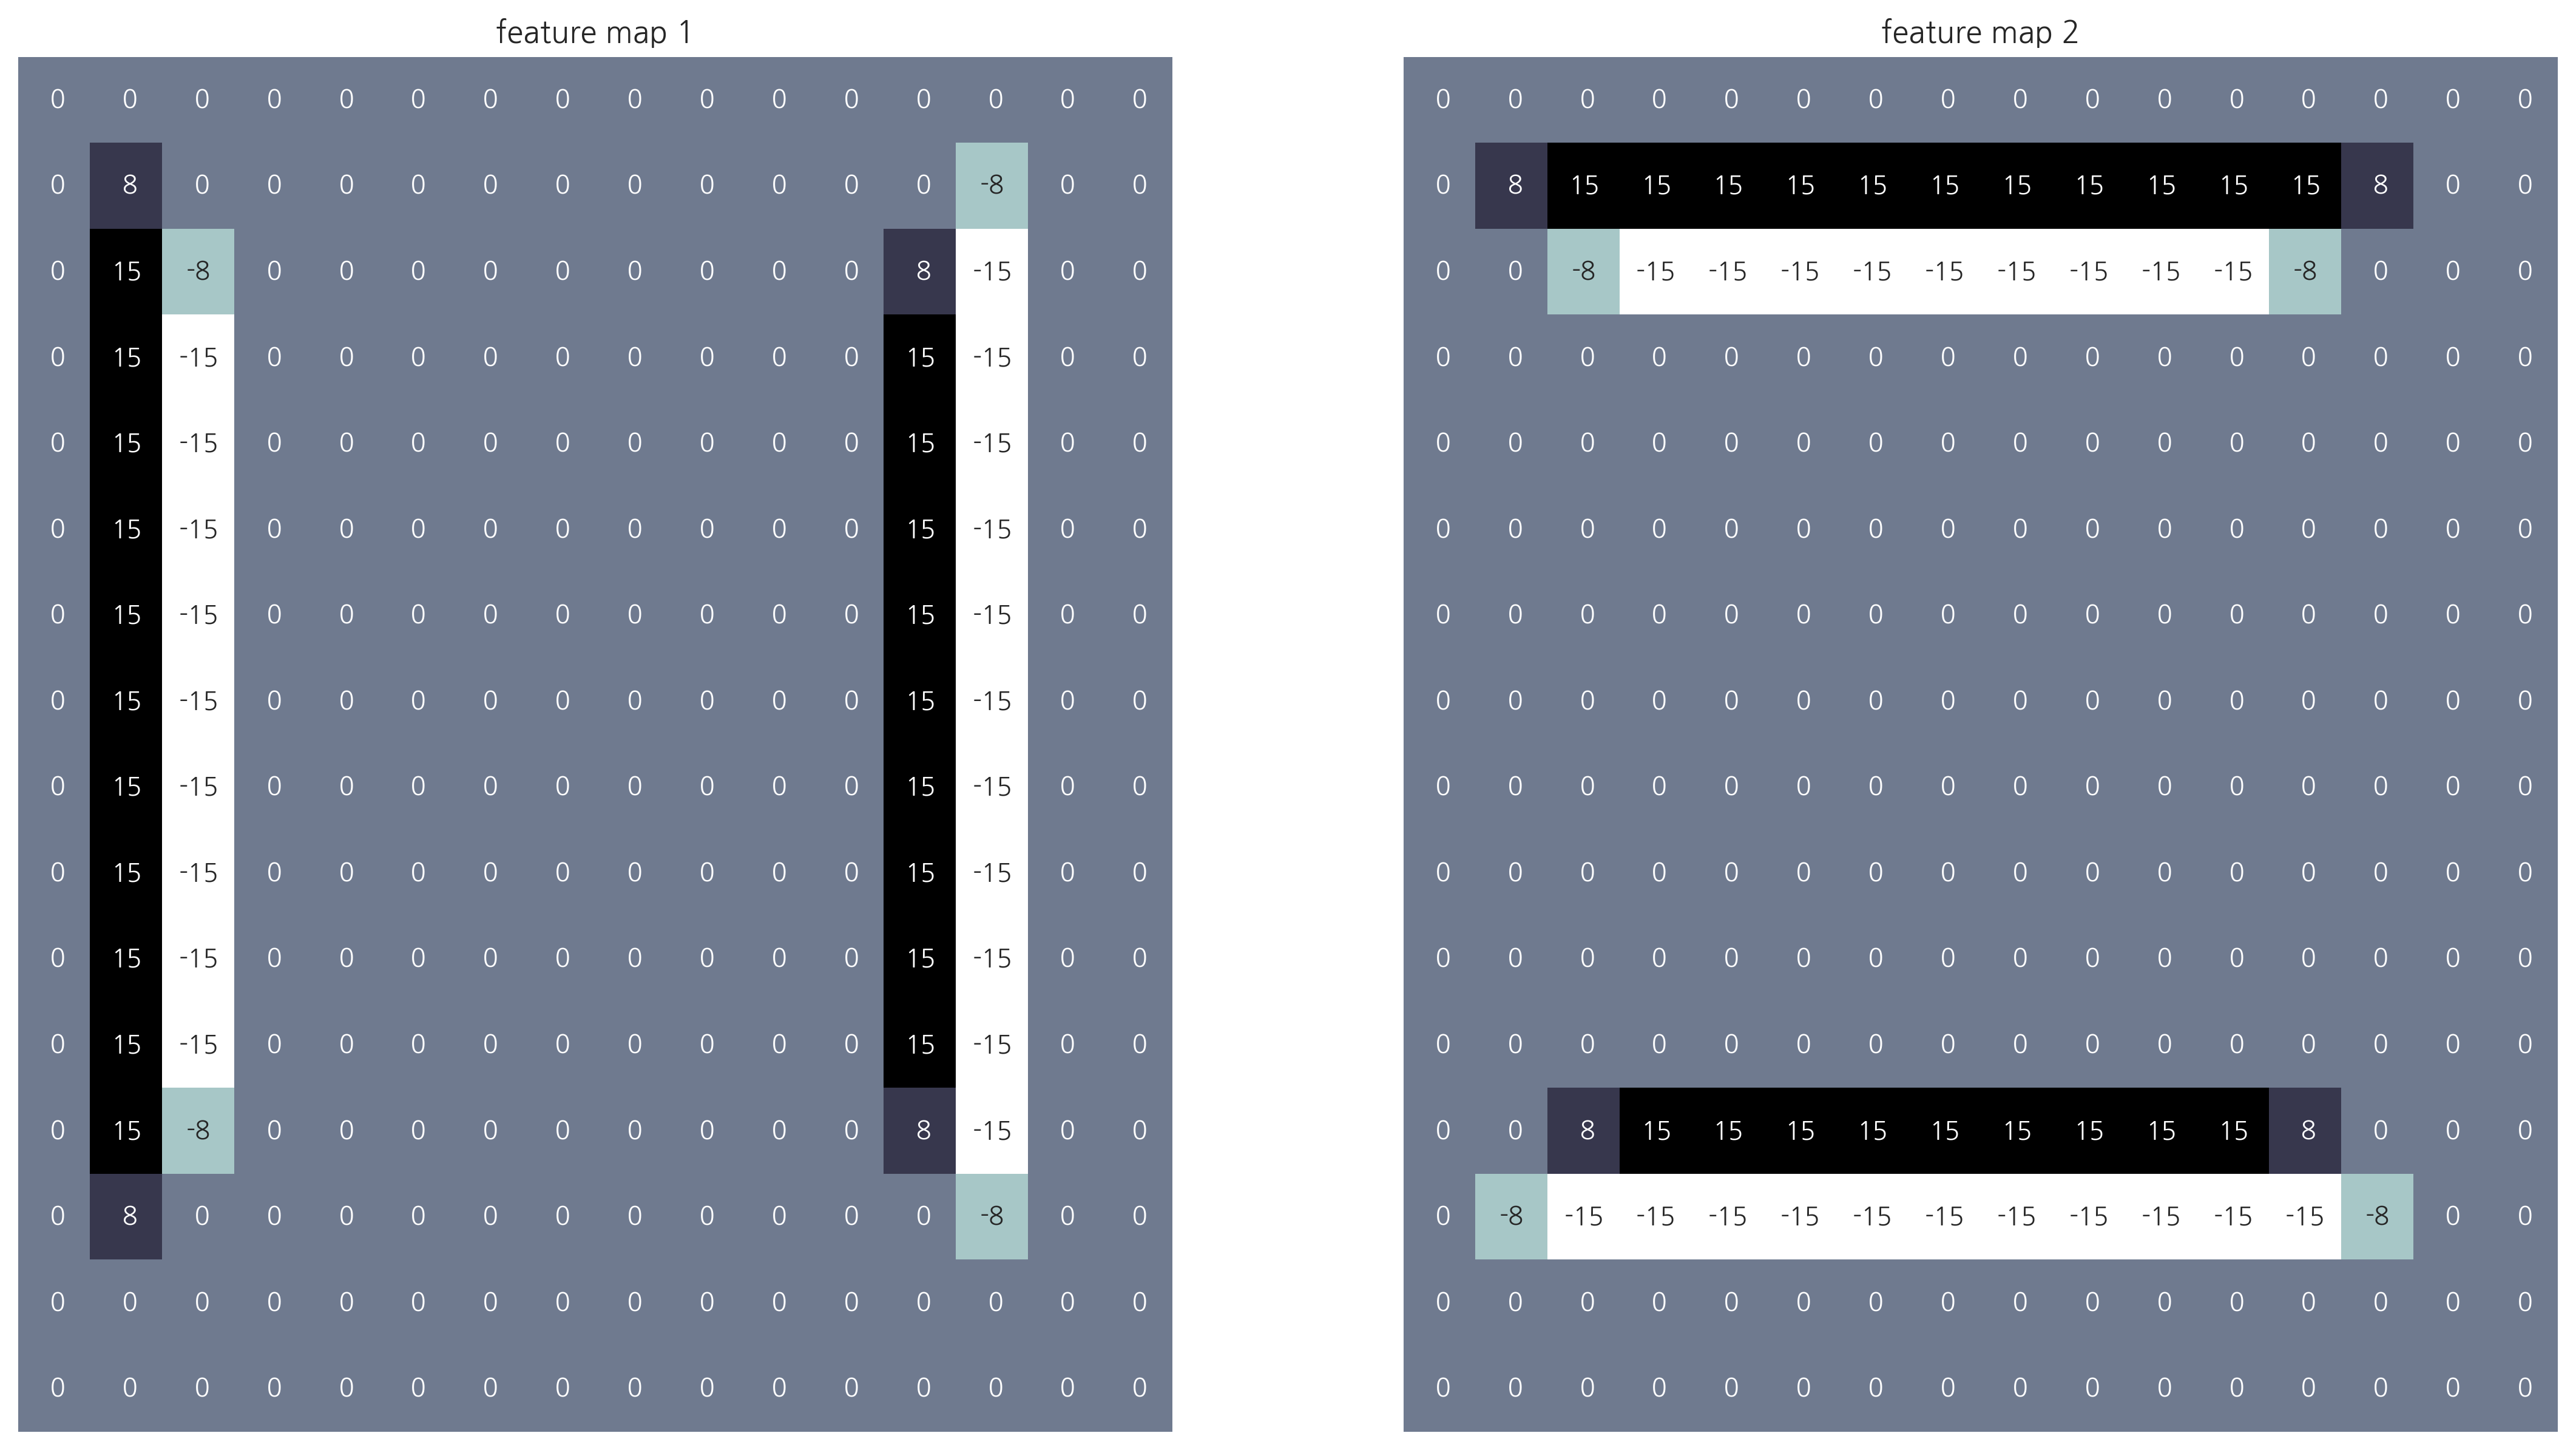

In [37]:
plt.figure(figsize=(18, 10))
plt.subplot(121)
sns.heatmap(phi1, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.title("feature map 1")
plt.subplot(122)
sns.heatmap(phi2, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.title("feature map 2")
plt.show()

# 2. Sparse Connectivity
* Each patch(**Local Receptive Field**) is connected to one pixel in hidden layer (**Sparse Connectivity**)

<img src="http://neuralnetworksanddeeplearning.com/images/tikz44.png">
<img src="http://neuralnetworksanddeeplearning.com/images/tikz45.png">

# 3. Shared Weights and Bias

* For every connection, uses same weights & bias
* Example) 5X5 Kernel $\rightarrow$ 26 Parameters (5X5+1)
 
$$
\begin{eqnarray} 
  \sigma\left(b + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m} a_{j+l, k+m} \right).
\end{eqnarray}
$$

# 4. Multiple Feature Maps

* Multiple feature maps are required to discover multiple features

<img src="http://neuralnetworksanddeeplearning.com/images/tikz46.png"> 

* 20 Feature Maps - Trained with MNIST

<img src="http://neuralnetworksanddeeplearning.com/images/net_full_layer_0.png" style="width:50%;"> 

# 5. Max Pooling
* Information reduction
* Only leave the information of whether the pattern exists in that patch or not
 
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width:50%;"> 

<img src="http://neuralnetworksanddeeplearning.com/images/tikz48.png">

In [38]:
from skimage.measure import block_reduce

phi1r = block_reduce(phi1, (2, 2), np.max)
phi2r = block_reduce(phi2, (2, 2), np.max)

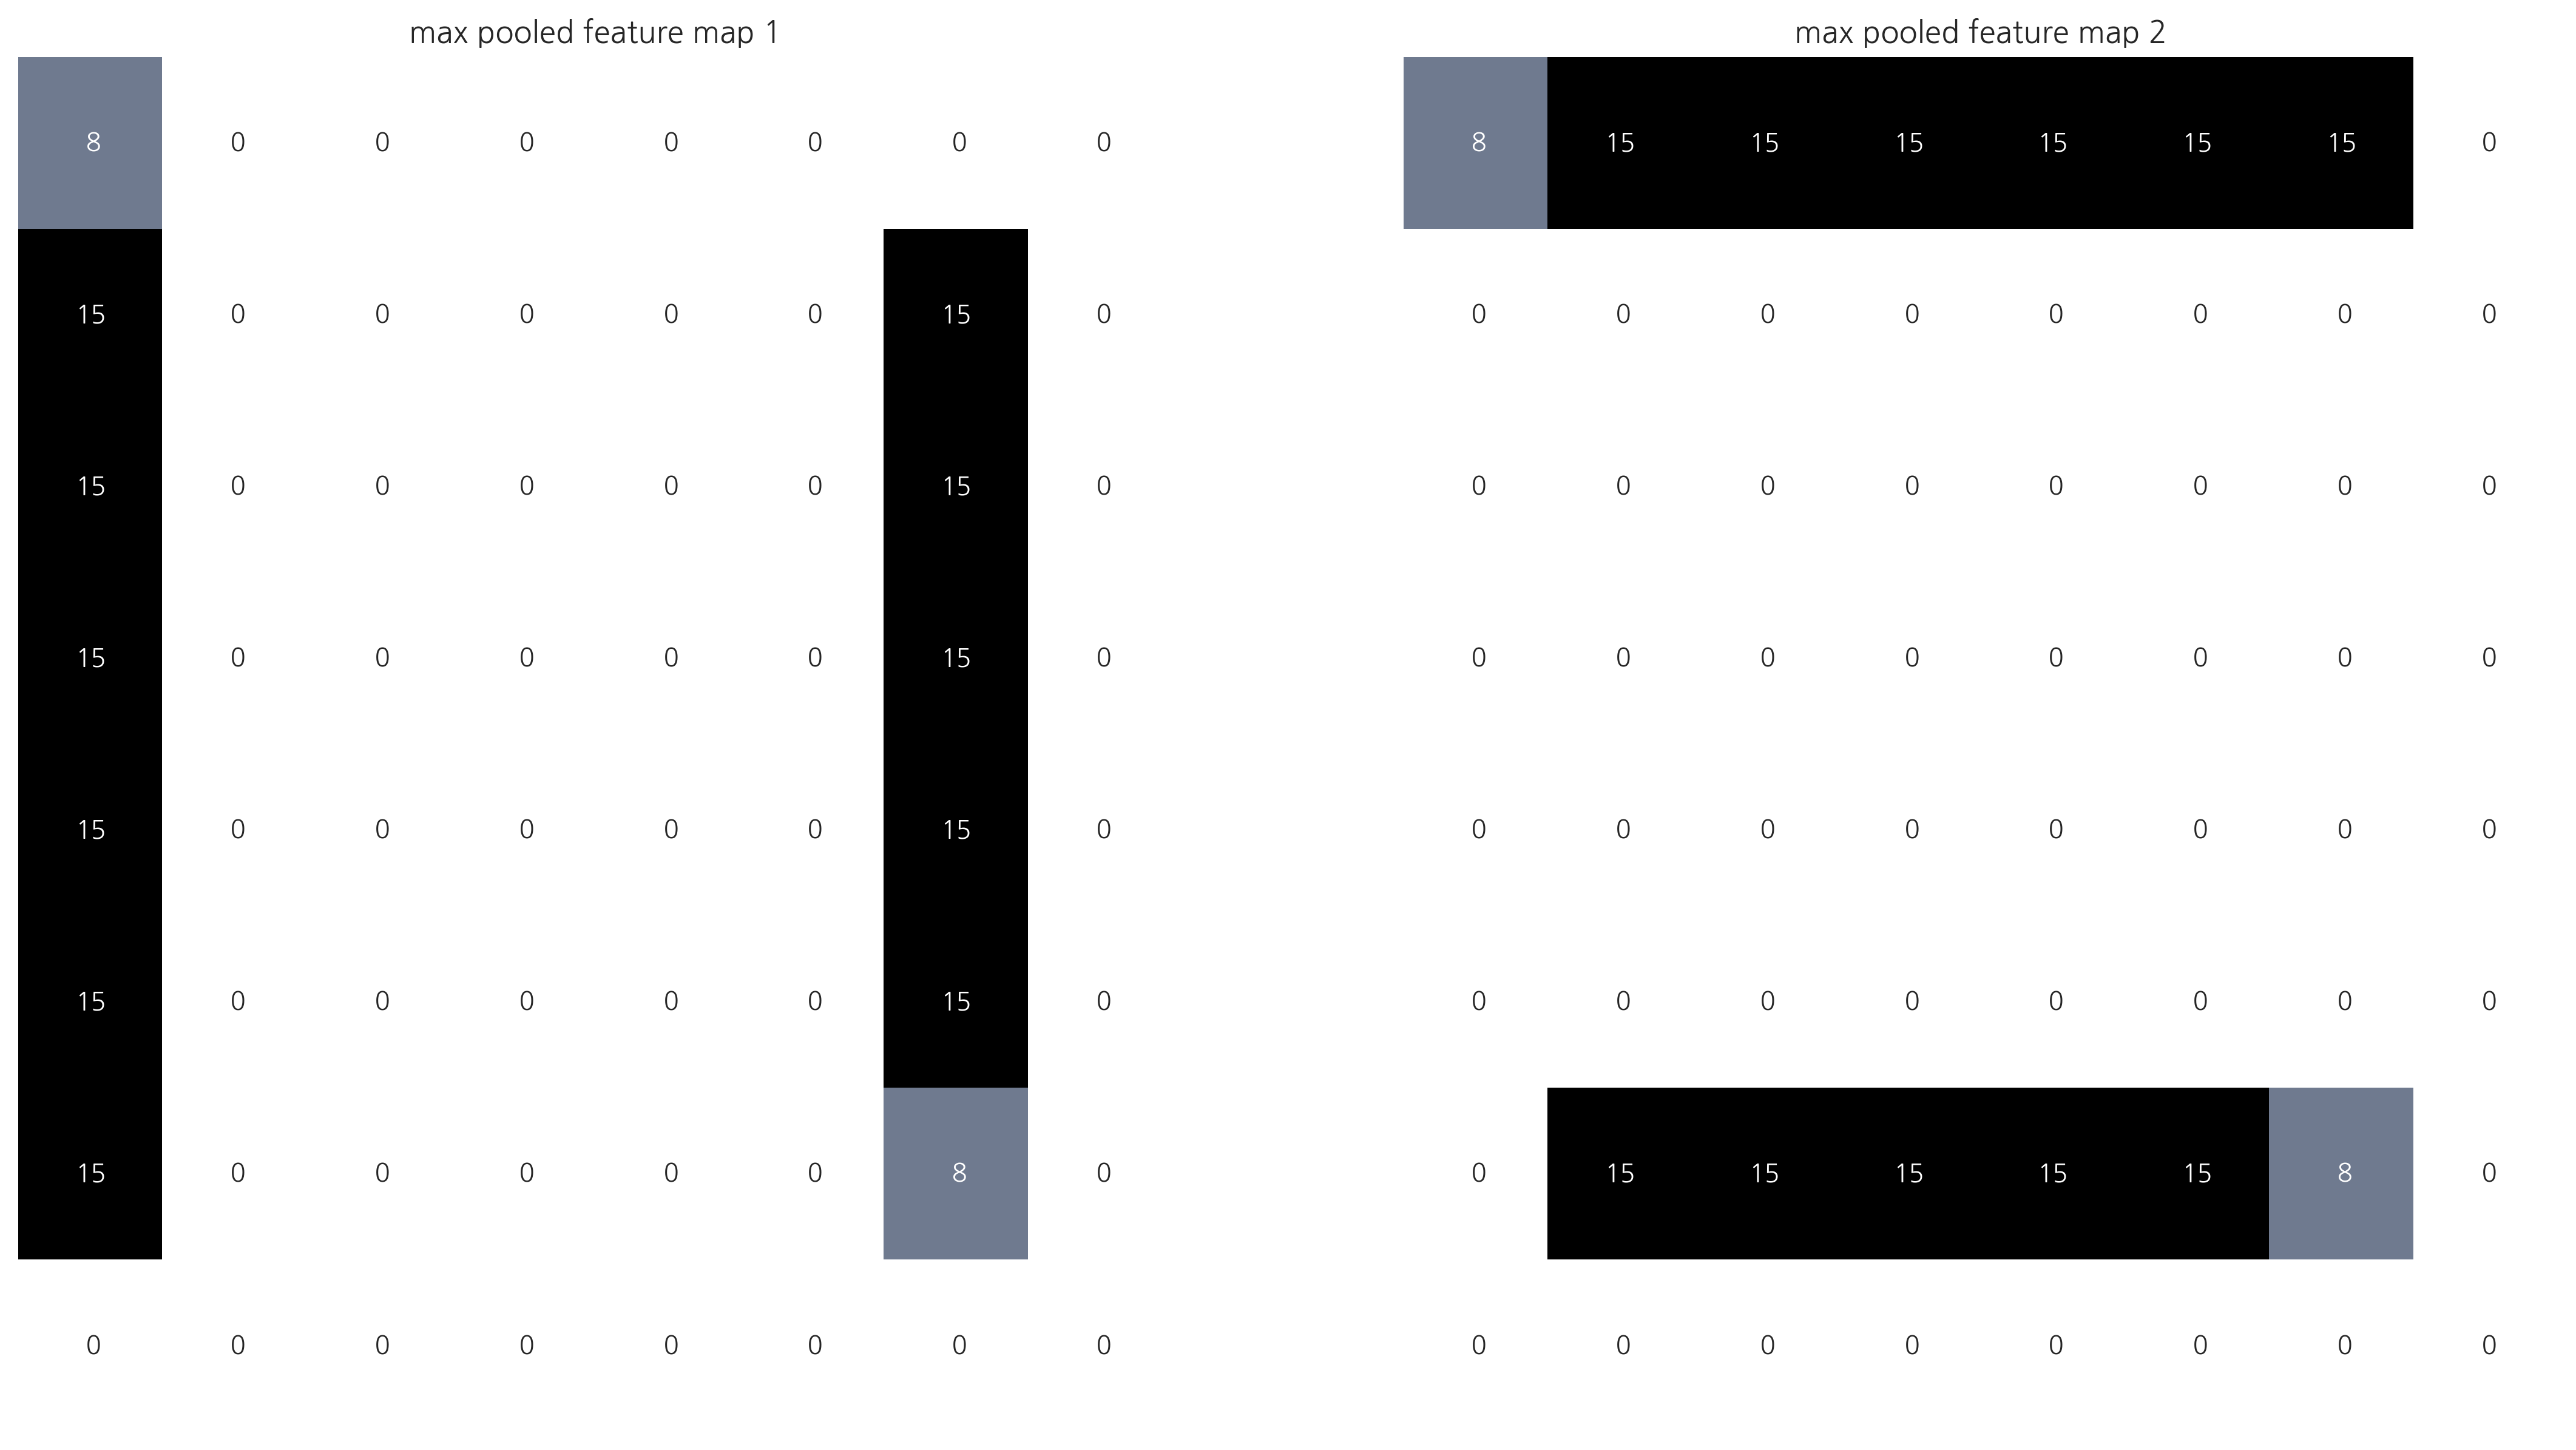

In [40]:
plt.figure(figsize=(18, 10))
plt.subplot(121)
sns.heatmap(phi1r, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.title("max pooled feature map 1")
plt.subplot(122)
sns.heatmap(phi2r, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f", 
            cbar=False, xticklabels=False, yticklabels=False)
plt.title("max pooled feature map 2")
plt.show()

# 6. Output Layer
* **Flatten $\rightarrow$ Dense(FCN) $\rightarrow$ Softmax**

<img src="http://neuralnetworksanddeeplearning.com/images/tikz49.png">

# 7. Multi-Channel CNN
* Color Image: 3 Channels (R,G,B)
* Apply different filter for each channel $\rightarrow$ Merge results
* [reference](http://cs231n.github.io/assets/conv-demo/index.html)

# 8. Demo

* http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html